In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [45]:
data = pd.read_csv('../data/observations.csv')
data.head()

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2020-10-11T11:44:31Z,928c5dee-0ee8-43e2-74a0-4650c755a092,928c5dee-0ee8-43e2-3ec6-556c30e10ee1,vital-signs,8302-2,Body Height,56.4,cm,numeric
1,2016-07-07T23:16:38Z,69bc203f-0f47-07dc-5a91-11cb124169e0,69bc203f-0f47-07dc-c360-b66532d84ff5,laboratory,4548-4,Hemoglobin A1c/Hemoglobin.total in Blood,6.3,%,numeric
2,2018-03-03T03:39:52Z,94ab4e9b-f775-ef31-5b62-801ea67803e8,94ab4e9b-f775-ef31-5118-0f41d6f3ab24,vital-signs,8302-2,Body Height,173.9,cm,numeric
3,2016-07-07T23:16:38Z,69bc203f-0f47-07dc-5a91-11cb124169e0,69bc203f-0f47-07dc-c360-b66532d84ff5,vital-signs,8302-2,Body Height,167.2,cm,numeric
4,2018-03-03T03:39:52Z,94ab4e9b-f775-ef31-5b62-801ea67803e8,94ab4e9b-f775-ef31-5118-0f41d6f3ab24,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric


In [46]:
data.info()
data.describe(include='all')
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924062 entries, 0 to 924061
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   DATE         924062 non-null  object
 1   PATIENT      924062 non-null  object
 2   ENCOUNTER    894653 non-null  object
 3   CATEGORY     894653 non-null  object
 4   CODE         924062 non-null  object
 5   DESCRIPTION  924062 non-null  object
 6   VALUE        924062 non-null  object
 7   UNITS        673322 non-null  object
 8   TYPE         924062 non-null  object
dtypes: object(9)
memory usage: 63.5+ MB


DATE                0
PATIENT             0
ENCOUNTER       29409
CATEGORY        29409
CODE                0
DESCRIPTION         0
VALUE               0
UNITS          250740
TYPE                0
dtype: int64

In [47]:
vitals = data[data["CATEGORY"] == "vital-signs"]
vitals["DESCRIPTION"].value_counts()


DESCRIPTION
Pain severity - 0-10 verbal numeric rating [Score] - Reported                        27553
Systolic Blood Pressure                                                              16743
Diastolic Blood Pressure                                                             16717
Body Weight                                                                          16397
Heart rate                                                                           16119
Respiratory rate                                                                     16119
Body Height                                                                          15861
Body mass index (BMI) [Ratio]                                                        14791
Weight difference [Mass difference] --pre dialysis - post dialysis                    9357
Body mass index (BMI) [Percentile] Per age and sex                                    2962
Weight-for-length Per age and sex                                             

In [48]:
target_vitals = [
    "Heart rate",
    "Systolic Blood Pressure",
    "Diastolic Blood Pressure",
    "Respiratory rate",
    "Body temperature",
    "Oxygen saturation in Arterial blood"
]

icu_vitals = data[data["DESCRIPTION"].isin(target_vitals)]
icu_vitals.head()


,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
10,2018-03-03T03:39:52Z,94ab4e9b-f775-ef31-5b62-801ea67803e8,94ab4e9b-f775-ef31-5118-0f41d6f3ab24,vital-signs,8462-4,Diastolic Blood Pressure,86.0,mm[Hg],numeric
11,2018-03-03T03:39:52Z,94ab4e9b-f775-ef31-5b62-801ea67803e8,94ab4e9b-f775-ef31-5118-0f41d6f3ab24,vital-signs,8480-6,Systolic Blood Pressure,116.0,mm[Hg],numeric
13,2018-03-03T03:39:52Z,94ab4e9b-f775-ef31-5b62-801ea67803e8,94ab4e9b-f775-ef31-5118-0f41d6f3ab24,vital-signs,8867-4,Heart rate,72.0,/min,numeric
14,2016-07-07T23:16:38Z,69bc203f-0f47-07dc-5a91-11cb124169e0,69bc203f-0f47-07dc-c360-b66532d84ff5,vital-signs,8462-4,Diastolic Blood Pressure,85.0,mm[Hg],numeric
15,2018-03-03T03:39:52Z,94ab4e9b-f775-ef31-5b62-801ea67803e8,94ab4e9b-f775-ef31-5118-0f41d6f3ab24,vital-signs,9279-1,Respiratory rate,15.0,/min,numeric


In [49]:
icu_vitals.groupby("DESCRIPTION")["UNITS"].unique()


DESCRIPTION
Body temperature                          [Cel]
Diastolic Blood Pressure               [mm[Hg]]
Heart rate                               [/min]
Oxygen saturation in Arterial blood         [%]
Respiratory rate                         [/min]
Systolic Blood Pressure                [mm[Hg]]
Name: UNITS, dtype: object

In [50]:
icu_vitals.isnull().sum()

DATE           0
PATIENT        0
ENCOUNTER      0
CATEGORY       0
CODE           0
DESCRIPTION    0
VALUE          0
UNITS          0
TYPE           0
dtype: int64

In [51]:
icu_vitals.dtypes


DATE           object
PATIENT        object
ENCOUNTER      object
CATEGORY       object
CODE           object
DESCRIPTION    object
VALUE          object
UNITS          object
TYPE           object
dtype: object

In [64]:
icu_vitals["VALUE"] = pd.to_numeric(icu_vitals["VALUE"],errors="coerce")
icu_vitals.dtypes
icu_vitals.isnull().sum()   

C:\Users\Siri Yasha Dinesh\AppData\Local\Temp\ipykernel_16704\432387359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_vitals["VALUE"] = pd.to_numeric(icu_vitals["VALUE"],errors="coerce")


DATE           0
PATIENT        0
ENCOUNTER      0
CATEGORY       0
CODE           0
DESCRIPTION    0
VALUE          0
UNITS          0
TYPE           0
dtype: int64

In [65]:
icu_vitals["DATE"] = pd.to_datetime(icu_vitals["DATE"])
icu_vitals.dtypes
icu_vitals.isnull().sum()   


C:\Users\Siri Yasha Dinesh\AppData\Local\Temp\ipykernel_16704\3278144898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icu_vitals["DATE"] = pd.to_datetime(icu_vitals["DATE"])


DATE           0
PATIENT        0
ENCOUNTER      0
CATEGORY       0
CODE           0
DESCRIPTION    0
VALUE          0
UNITS          0
TYPE           0
dtype: int64

In [54]:
icu_vitals.groupby("DESCRIPTION")["VALUE"].describe()


,count,mean,std,min,25%,50%,75%,max
DESCRIPTION,,,,,,,,
Body temperature,1204.0,38.236794,1.332920,36.1,37.4,37.8,38.7,42.2
Diastolic Blood Pressure,16743.0,79.417243,11.624177,39.0,72.0,79.0,86.0,128.0
Heart rate,16119.0,80.855754,14.685438,50.0,70.0,80.0,90.0,198.7
Oxygen saturation in Arterial blood,1030.0,87.097184,7.478695,75.0,80.7,86.2,95.0,100.0
Respiratory rate,16119.0,14.234152,2.287543,12.0,13.0,14.0,15.0,39.9
Systolic Blood Pressure,16743.0,116.785403,15.889836,45.6,106.0,117.0,128.0,179.8


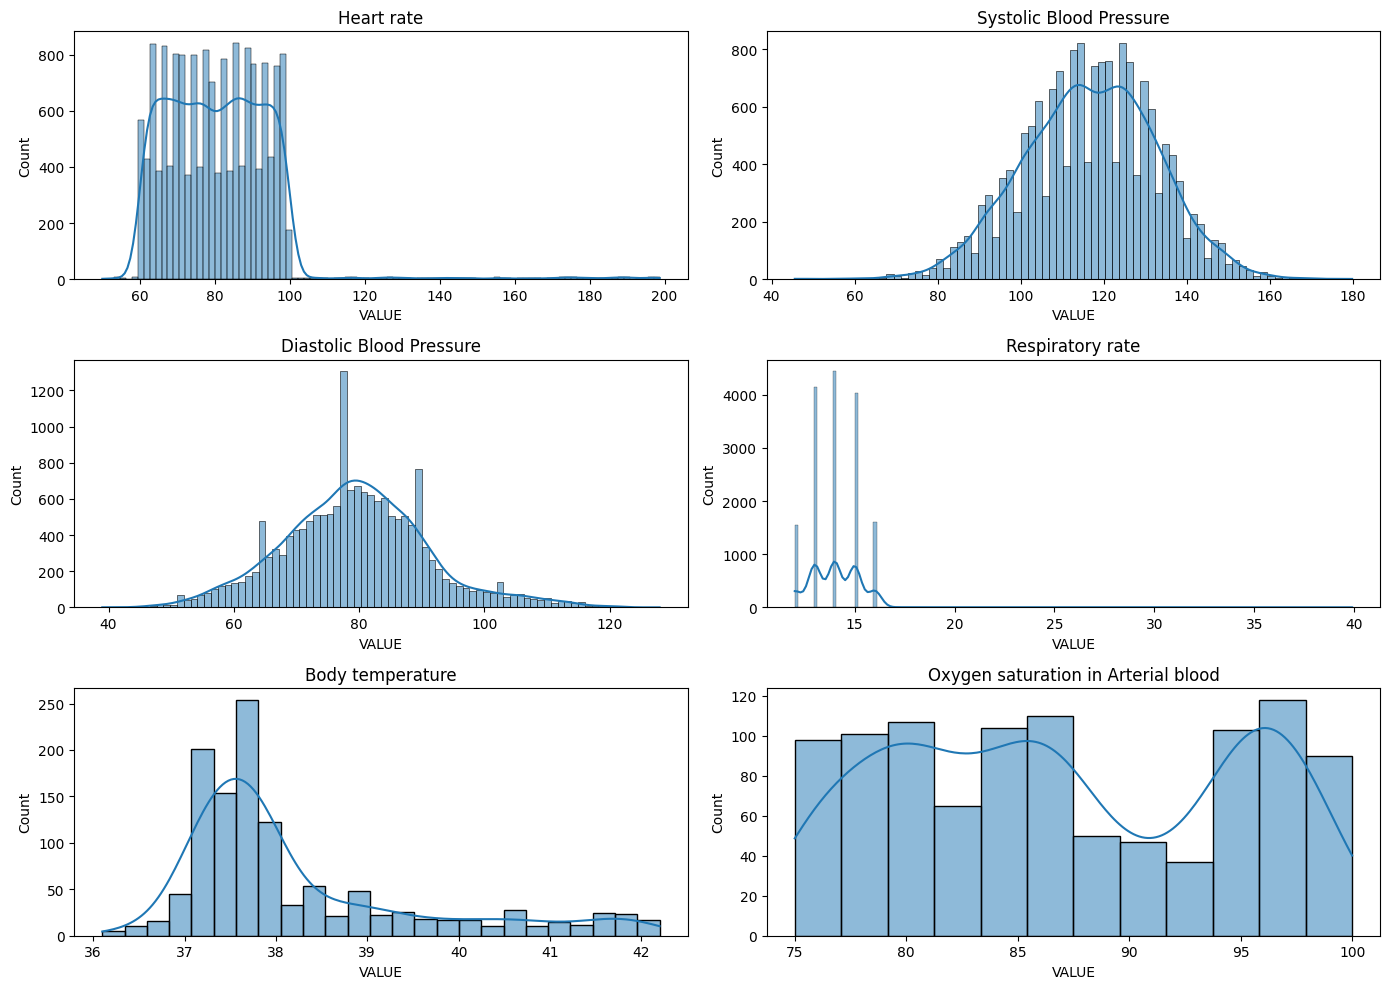

In [55]:
vitals_to_plot = [
    "Heart rate",
    "Systolic Blood Pressure",
    "Diastolic Blood Pressure",
    "Respiratory rate",
    "Body temperature",
    "Oxygen saturation in Arterial blood"
]

plt.figure(figsize=(14, 10))

for i, vital in enumerate(vitals_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(
        icu_vitals[icu_vitals["DESCRIPTION"] == vital]["VALUE"].astype(float),
        kde=True
    )
    plt.title(vital)

plt.tight_layout()
plt.show()

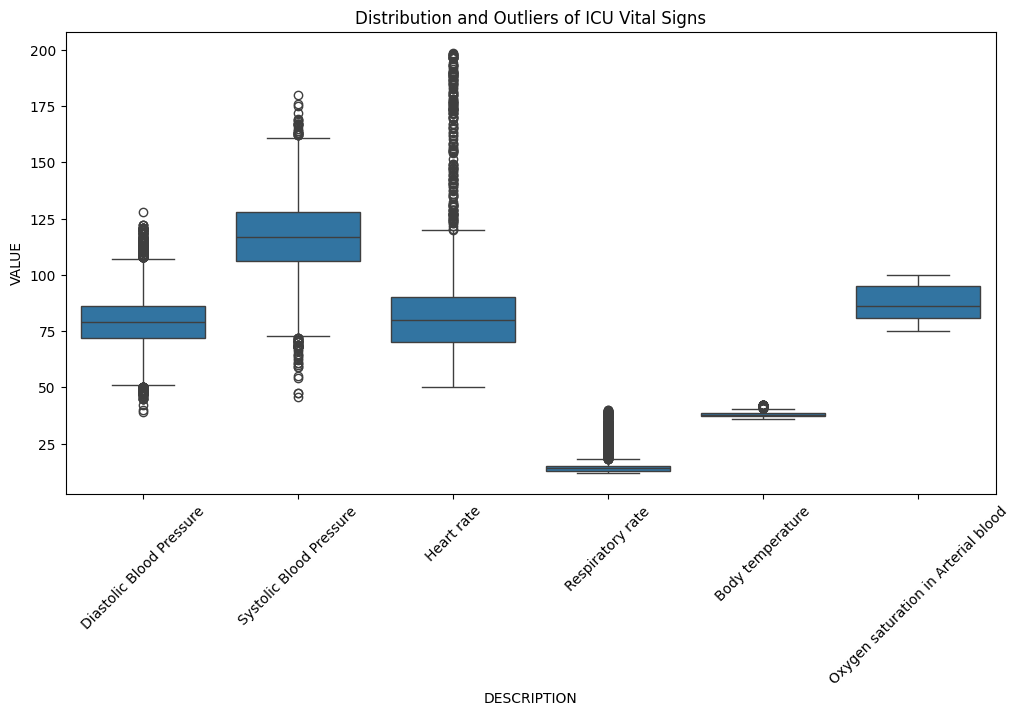

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=icu_vitals[icu_vitals["DESCRIPTION"].isin(vitals_to_plot)],
    x="DESCRIPTION",
    y="VALUE"
)
plt.xticks(rotation=45)
plt.title("Distribution and Outliers of ICU Vital Signs")
plt.show()

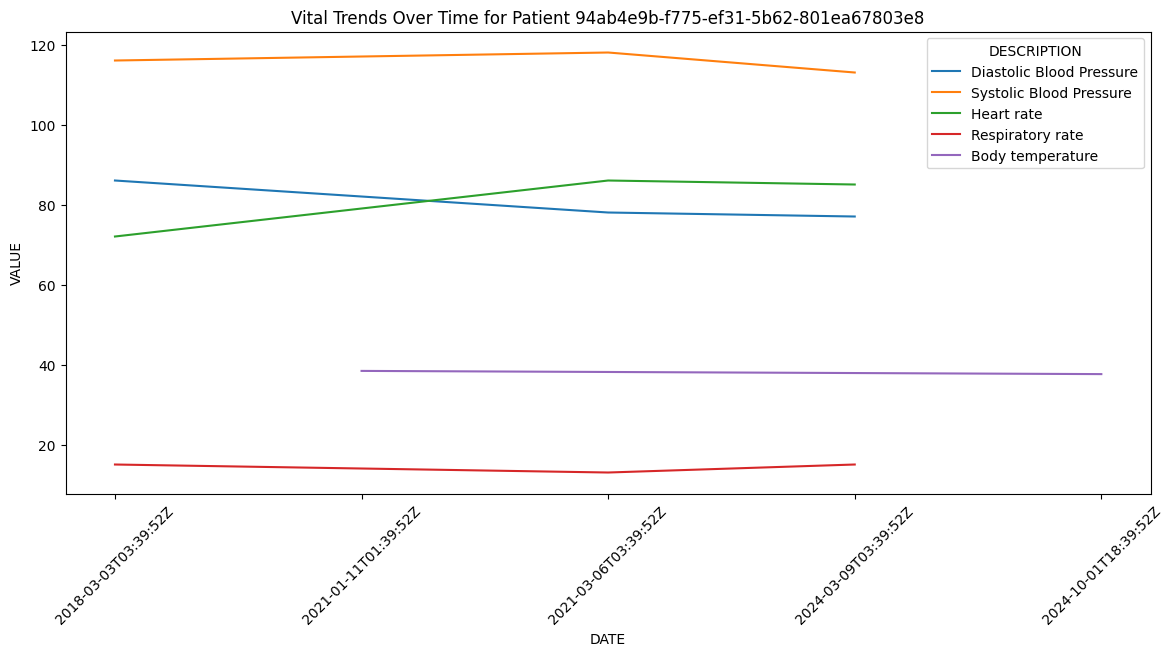

In [57]:
sample_patient = icu_vitals["PATIENT"].iloc[0]

patient_data = icu_vitals[
    (icu_vitals["PATIENT"] == sample_patient) &
    (icu_vitals["DESCRIPTION"].isin(vitals_to_plot))
]

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=patient_data,
    x="DATE",
    y="VALUE",
    hue="DESCRIPTION"
)
plt.xticks(rotation=45)
plt.title(f"Vital Trends Over Time for Patient {sample_patient}")
plt.show()


In [58]:

dashboard_data = icu_vitals.pivot_table(
    index=["PATIENT", "DATE"],
    columns="DESCRIPTION",
    values="VALUE"
).reset_index()

dashboard_data.head()

DESCRIPTION,PATIENT,DATE,Body temperature,Diastolic Blood Pressure,Heart rate,Oxygen saturation in Arterial blood,Respiratory rate,Systolic Blood Pressure
0,00063b0a-de17-82cc-1828-f2f6939836fb,2016-05-08T10:28:05Z,NaN,84.0,67.0,NaN,12.0,110.0
1,00063b0a-de17-82cc-1828-f2f6939836fb,2017-05-14T10:28:05Z,NaN,82.0,79.0,NaN,13.0,124.0
2,00063b0a-de17-82cc-1828-f2f6939836fb,2018-05-20T10:28:05Z,NaN,83.0,86.0,NaN,14.0,108.0
3,00063b0a-de17-82cc-1828-f2f6939836fb,2019-05-26T10:28:05Z,NaN,87.0,84.0,NaN,14.0,112.0
4,00063b0a-de17-82cc-1828-f2f6939836fb,2020-05-31T10:28:05Z,NaN,82.0,69.0,NaN,15.0,108.0


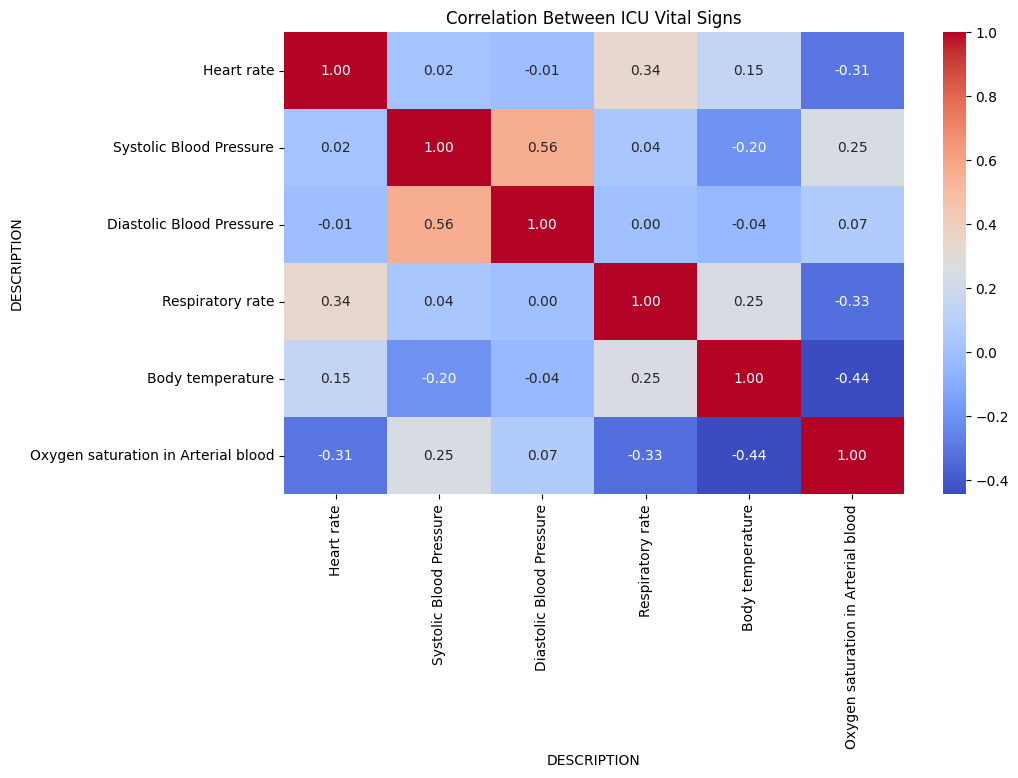

In [ ]:

vitals_to_plot = [
    "Heart rate",
    "Systolic Blood Pressure",
    "Diastolic Blood Pressure",
    "Respiratory rate",
    "Body temperature",
    "Oxygen saturation in Arterial blood"
]
plt.figure(figsize=(10, 6))
sns.heatmap(
    dashboard_data[vitals_to_plot].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Between ICU Vital Signs")
plt.show()




In [72]:
new_dashboard_data = dashboard_data.sort_values(["PATIENT", "DATE"])

new_dashboard_data = (
    new_dashboard_data
    .groupby("PATIENT")
    .ffill()
)
new_dashboard_data.dropna(subset=vitals_to_plot, inplace=True)
new_dashboard_data

DESCRIPTION,DATE,Body temperature,Diastolic Blood Pressure,Heart rate,Oxygen saturation in Arterial blood,Respiratory rate,Systolic Blood Pressure
100,2025-10-24T07:28:04Z,38.0,88.0,86.0,98.0,14.0,136.0
101,2025-10-30T06:35:44Z,38.0,88.0,86.0,96.0,14.0,136.0
102,2025-10-30T12:38:42Z,38.0,88.0,86.0,96.0,14.0,136.0
103,2025-10-31T01:28:37Z,38.0,88.0,86.0,96.0,14.0,136.0
104,2025-10-31T13:28:37Z,38.0,88.0,86.0,96.0,14.0,136.0
...,...,...,...,...,...,...,...
18071,2021-01-07T03:59:47Z,37.1,80.0,75.0,99.9,16.0,130.0
18072,2022-01-13T03:59:47Z,37.1,83.0,67.0,99.9,13.0,135.0
18073,2023-01-19T03:59:47Z,37.1,82.0,83.0,99.9,12.0,140.0
18074,2024-01-25T03:59:47Z,37.1,83.0,95.0,99.9,16.0,134.0


In [74]:
new_dashboard_data.to_csv("icu_vitals.csv", index=False)    

In [76]:
train_df = new_dashboard_data.rename(columns={
    "Heart rate": "hr",
    "Systolic Blood Pressure": "sbp",
    "Diastolic Blood Pressure": "dbp",
    "Oxygen saturation in Arterial blood": "spo2",
    "Respiratory rate": "rr",
    "Body temperature": "temp"
})

train_df = train_df[["hr", "sbp", "dbp", "spo2", "rr", "temp"]]

train_df.to_csv(
    "../public/data/icu_train.csv",
    index=False
)